<a href="https://colab.research.google.com/github/Sokratis1000/Time-Series-Predcition--Construction-Hiring-/blob/main/1990's_including_risk_factors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pytorch-lightning==1.6
!pip install pytorch_forecasting

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 582 kB 5.2 MB/s 
     |████████████████████████████████| 529 kB 46.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 127 kB 5.1 MB/s 
     |████████████████████████████████| 308 kB 45.2 MB/s 
     |████████████████████████████████| 209 kB 46.4 MB/s 
     |████████████████████████████████| 81 kB 10.5 MB/s 
     |████████████████████████████████| 78 kB 7.5 MB/s 
     |████████████████████████████████| 50 kB 5.8 MB/s 
     |████████████████████████████████| 147 kB 63.0 MB/s 
     |████████████████████████████████| 112 kB 60.5 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=a428e8b730921a658adfd26bf2a2a259c1c268349d428aca466f3ed4eac72cfc
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae

In [ ]:
#https://pytorch-forecasting.readthedocs.io/en/latest/tutorials/stallion.html
import warnings
from pathlib import Path
import pandas as pd
import numpy as np
import torch
import copy


import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor
from pytorch_lightning.loggers import TensorBoardLogger

from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer, Baseline
from pytorch_forecasting.data import GroupNormalizer

from pytorch_forecasting.metrics import PoissonLoss, QuantileLoss, SMAPE
from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters

/usr/local/lib/python3.7/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (SMAPE). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_full_state_property`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)


In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving From_1990.csv to From_1990.csv


In [ ]:
import pandas as pd
import io
data = pd.read_csv(io.BytesIO(data_to_load['From_1990.csv']),encoding = "ISO-8859-1")

In [ ]:
data['Date']=pd.to_datetime(data['Date'])

In [ ]:
data.sample(10, random_state=2)

State       Date  Construction_Employment_State  \
4038          Hawaii 2006-07-01                          12.31   
18638      Wisconsin 2007-03-01                         127.90   
2193        Colorado 2012-10-01                         118.30   
8991     Mississippi 2003-04-01                          51.40   
13758       Oklahoma 2016-07-01                          77.90   
8497       Minnesota 1994-02-01                          78.00   
1036         Arizona 2012-05-01                         113.00   
16931        Vermont 1992-12-01                          11.70   
18224  West Virginia 2004-09-01                          34.50   
3194         Florida 2000-03-01                         479.40   

       Coincident_Economic_Activity_State  Labor_Force_Participation_State  \
4038                                98.45                             66.2   
18638                               99.54                             71.0   
2193                               109.19                             68.7   
8991                                93.04                             61.5   
13758                              117.30                             61.1   
8497                                71.20                             74.7   
1036                               105.49                             61.1   
16931                               66.57                             71.9   
18224                               91.58                             55.0   
3194                                78.95                             67.0   

       Permits_Housing_State  Unemployment_Rate_State  Property_Damage_State  \
4038                  370.84                      2.6                    500   
18638                1468.36                      4.8                      0   
2193                 1344.28                      7.6                2500000   
8991                  817.10                      6.4              317000000   
13758                 711.90                      4.8                      0   
8497                 1731.98                      4.4                      0   
1036                 1478.75                      8.5                 270000   
16931                 167.10                      6.1                      0   
18224                 396.21                      5.6              117200000   
3194                 8994.09                      3.7                      0   

       Construction_Employment_US  PPI_Machinary_US  ...  Dist_Virginia  \
4038                         7712             175.5  ...        6180.41   
18638                        7706             178.8  ...        5936.87   
2193                         5674             206.3  ...        1373.46   
8991                         6689             153.3  ...        6590.83   
13758                        6735             219.1  ...        6456.47   
8497                         4923             133.4  ...        5865.88   
1036                         5604             205.1  ...        6569.67   
16931                        4630             130.5  ...        5651.67   
18224                        7029             159.4  ...        6131.85   
3194                         6811             148.3  ...        6588.95   

       Dist_Washington  Dist_WestVirginia  Dist_Wisconsin  Dist_Wyoming  \
4038           2330.75            3994.52         3677.80       2922.90   
18638          1465.90             403.21            0.00        759.75   
2193           4993.18            6111.60         5793.59       5692.00   
8991           1724.94             554.55          654.84        880.88   
13758          1323.22             782.28          636.25        483.05   
8497           1210.08             656.15          257.45        556.75   
1036            969.42            1503.64         1269.96        577.26   
16931          2023.57             528.44          644.59       1399.21   
18224          1850.37               0.00      

In [ ]:
# add time index
data["time_idx"] = data["Date"].dt.year * 12 + data["Date"].dt.month
data["time_idx"] -= data["time_idx"].min()
# add additional features
data["month"] = data.Date.dt.month.astype(str).astype("category")  # categories have be strings
data["log_Construction_Employment_State"] = np.log(data.Construction_Employment_State + 1e-8)
data["avg_volume_by_state"] = data.groupby(["time_idx", "State"], observed=True).Construction_Employment_State.transform("mean")



#we want to encode special days as one variable and thus need to first reverse one-hot encoding
Extreme_Events=[
"Recession",
]
data[Extreme_Events] = data[Extreme_Events].apply(lambda x: x.map({0: "-", 1: x.name})).astype("category")
data.sample(10, random_state=521)

State       Date  Construction_Employment_State  \
16496          Texas 2020-09-01                          718.1   
14227   Pennsylvania 1991-08-01                          203.7   
5425            Iowa 1994-02-01                           50.2   
6576       Louisiana 1994-01-01                          102.1   
6271        Kentucky 2000-08-01                           85.6   
18192  West Virginia 2002-01-01                           34.5   
1918      California 2021-11-01                          882.0   
13436           Ohio 2021-09-01                          222.9   
8894     Mississippi 1995-03-01                           43.1   
9839         Montana 2009-12-01                           22.6   

       Coincident_Economic_Activity_State  Labor_Force_Participation_State  \
16496                              141.34                             63.0   
14227                               69.69                              6.8   
5425                                74.98                             72.7   
6576                                80.33                             61.4   
6271                                93.11                             63.3   
18192                               87.08                             55.9   
1918                               155.93                              5.8   
13436                              122.64                             61.5   
8894                                82.74                             62.9   
9839                                80.91                             64.8   

       Permits_Housing_State  Unemployment_Rate_State  Property_Damage_State  \
16496               15261.04                      7.7                      0   
14227                2606.74                      6.8                5000000   
5425                  534.09                      3.8                      0   
6576                 1114.25                      7.9                      0   
6271                 1338.13                      4.2                 500000   
18192                 322.60                      6.1                      0   
1918                 5772.74                      5.8                      0   
13436                1541.76                      4.7                      0   
8894                  550.93                      6.0                      0   
9839                  111.82                      7.4                      0   

       Construction_Employment_US  PPI_Machinary_US  ...  Dist_Wyoming  \
16496                        7243           236.500  ...        824.13   
14227                        4733           125.800  ...       1349.71   
5425                         4923           133.400  ...        505.52   
6576                         4940           133.400  ...        983.39   
6271                         6796           148.800  ...        896.20   
18192                        6775           149.100  ...       1081.34   
1918                         7502           258.281  ...        766.89   
13436                        7427           249.860  ...        996.90   
8894                         5242           136.100  ...        880.88   
9839                         5654           191.200  ...        322.89   

       Risk_index  Expected_Loss_per_Capita  Annual_Expected_Losses_Millions  \
16496       12.89                    183.53                             4615   
14227        8.79                     32.49                              413   
5425        10.82                    204.67                              623   
6576        12.85                    248.78                             1128   
6271         8.65                    111.74                              485   
18192        7.33                     53.90                              100   
1918        28.10                    183.07                             6820   
13436        8.47                     38.79                              448   
8894        1

In [ ]:

max_prediction_length = 6
max_encoder_length = 24
#min_prediction_idx=300
training_cutoff = data["time_idx"].max() - max_prediction_length
validation_start=data["time_idx"].max() - max_prediction_length - max_encoder_length
training = TimeSeriesDataSet(
    data[lambda x: x.time_idx <= training_cutoff],
    time_idx="time_idx",
    target="Construction_Employment_State",
    group_ids=["State"],
    min_encoder_length=max_encoder_length // 2,  # keep encoder length long (as it is in the validation set)
    max_encoder_length=max_encoder_length,
    min_prediction_length=1,
    max_prediction_length=max_prediction_length,
    static_categoricals=["State","Greatest_Potential_Hazard"],
    static_reals=["Dist_Alabama","Dist_Alaska","Dist_Arkansas","Dist_California","Dist_Colorado","Dist_Connecticut","Dist_Delaware","Dist_Florida","Dist_Georgia","Dist_Hawaii","Dist_Idaho","Dist_Illinois","Dist_Indiana","Dist_Kansas","Dist_Kentucky","Dist_Louisiana","Dist_Maine","Dist_Maryland","Dist_Massachusetts","Dist_Michigan","Dist_Minnesota","Dist_Mississippi","Dist_Missouri","Dist_Montana","Dist_Nebraska","Dist_NewHampshire","Dist_Nevada","Dist_NewJersey","Dist_NewMexico","Dist_New York","Dist_NorthCarolina","Dist_NorthDakota","Dist_Ohio","Dist_Oklahoma","Dist_Oregon","Dist_Pennsylvania","Dist_RhodeIsland","Dist_SouthCarolina","Dist_SouthDakota","Dist_Tennessee","Dist_Texas","Dist_Utah","Dist_Vermont","Dist_Virginia","Dist_Washington","Dist_WestVirginia","Dist_Wisconsin","Dist_Wyoming","Risk_index","Expected_Loss_per_Capita","Annual_Expected_Losses_Millions","Building_Losses_Percent"],
    #min_prediction_idx=min_prediction_idx,
    time_varying_known_categoricals=["month"],
    time_varying_known_reals=["time_idx"],
    time_varying_unknown_categoricals=["Extreme_Events"],
    variable_groups={"Extreme_Events": Extreme_Events},  # group of categorical variables can be treated as one variable
    #time_varying_unknown_categoricals=[],
    time_varying_unknown_reals=["Construction_Employment_State","Coincident_Economic_Activity_State",
        "Labor_Force_Participation_State",
        "Permits_Housing_State",
        "Unemployment_Rate_State",
        "Property_Damage_State",
        "Construction_Employment_US",
        "PPI_Machinary_US",
        "PPI_Material_US",
        "CPI_US",
        "Labor_Force_Participation_US",
        "FFER_US",
        "New_Privately_Owned_Houses_US",
        "Unemployment_Rate_US",
        "Hourly_Earning_US",
        "CCI_US",
        "BCI_US",
        "MPI_US",
        "Construction_Spending_Total_US",
        "Construction_Spending_Private_US",
        "Construction_Spending_Public_US",
        "Total_Tax_Recipt",
        "Ind_Income_Tax",
        "Corporate_Tax",
        "Wages_Tax",
        "Income_Security",
    ],

    target_normalizer=GroupNormalizer(
        groups=["State"],transformation="softplus"
    ),  # use softplus with beta=1.0 and normalize by group
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,

)
# create validation set (predict=True) which means to predict the last max_prediction_length points in time for each series
validation = TimeSeriesDataSet.from_dataset(training, data[lambda x:x.time_idx > validation_start], predict=True, stop_randomization=True)

# create dataloaders for model
batch_size = 128  # set this between 32 to 128
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size * 10, num_workers=0)
print(type(val_dataloader))



<class 'torch.utils.data.dataloader.DataLoader'>


In [ ]:
# calculate baseline mean absolute error, i.e. predict next value as the last available value from the history
actuals = torch.cat([y for x, (y, weight) in iter(val_dataloader)])
baseline_predictions = Baseline().predict(val_dataloader)
(actuals - baseline_predictions).abs().mean().item()

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/parsing.py:245: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  f"Attribute {k!r} is an instance of `nn.Module` and is already saved during checkpointing."
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/parsing.py:245: UserWarning: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
  f"Attribute {k!r} is an instance of `nn.Module` and is already saved during checkpointing."


1.8803339004516602

In [ ]:
# configure network and trainer
pl.seed_everything(42)
trainer = pl.Trainer(
    gpus=1,
    # clipping gradients is a hyperparameter and important to prevent divergance
    # of the gradient for recurrent neural networks
    gradient_clip_val=0.1,
)


tft = TemporalFusionTransformer.from_dataset(
    training,
    # not meaningful for finding the learning rate but otherwise very important
    learning_rate=0.03,
    hidden_size=32,  # most important hyperparameter apart from learning rate
    # number of attention heads. Set to up to 4 for large datasets
    attention_head_size=4,
    dropout=0.1,  # between 0.1 and 0.3 are good values
    hidden_continuous_size=8,  # set to <= hidden_size
    output_size=7,  # 7 quantiles by default
    loss=QuantileLoss(),
    # reduce learning rate if no improvement in validation loss after x epochs
    reduce_on_plateau_patience=4,
)
print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

INFO:pytorch_lightning.utilities.seed:Global seed set to 42
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/loops/utilities.py:94: PossibleUserWarning: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
  category=PossibleUserWarning,
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True, used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.7/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (QuantileLoss). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant 

Number of parameters in network: 161.4k


INFO:pytorch_lightning.accelerators.gpu:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_cda5de2d-42fa-4c03-aa32-8a7438f5e2de.ckpt
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1722: UserWarning: Be aware that when using `ckpt_path`, callbacks used to create the checkpoint need to be provided during `Trainer` instantiation. Please add the following callbacks: ["ModelCheckpoint{'monitor': None, 'mode': 'min', 'every_n_train_steps': 0, 'every_n_epochs': 1, 'train_time_interval': None, 'save_on_train_epoch_end': None}"].
  "Be aware that when using `ckpt_path`,"


suggested learning rate: 0.030199517204020167


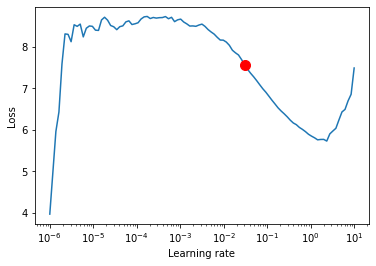

In [ ]:
# find optimal learning rate
res = trainer.tuner.lr_find(
    tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
    max_lr=10.0,
    min_lr=1e-6,
)

print(f"suggested learning rate: {res.suggestion()}")
fig = res.plot(show=True, suggest=True)
fig.show()

In [ ]:
# configure network and trainer
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=100, verbose=False, mode="min")
lr_logger = LearningRateMonitor()  # log the learning rate
logger = TensorBoardLogger("lightning_logs")  # logging results to a tensorboard

trainer = pl.Trainer(
    max_epochs=1000,
    gpus=1,
    gradient_clip_val=0.1,
    limit_train_batches=30,  # coment in for training, running valiation every 30 batches
    # fast_dev_run=True,  # comment in to check that networkor dataset has no serious bugs
    callbacks=[lr_logger, early_stop_callback],
    logger=logger,
)


tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.03,
    hidden_size=32,
    attention_head_size=4,
    dropout=0.3,
    hidden_continuous_size=8,
    output_size=7,  # 7 quantiles by default
    loss=QuantileLoss(),
    log_interval=10,  # uncomment for learning rate finder and otherwise, e.g. to 10 for logging every 10 batches
    reduce_on_plateau_patience=4,
)
print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True, used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Number of parameters in network: 161.4k


In [ ]:
import tensorflow as tf
import tensorboard as tb
tf.io.gfile = tb.compat.tensorflow_stub.io.gfile
# can be stopped at any point -- did at 24 epochs
# fit network
trainer.fit(
    tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
)

INFO:pytorch_lightning.accelerators.gpu:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
   | Name                               | Type                            | Params
----------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0     
1  | logging_metrics                    | ModuleList                      | 0     
2  | input_embeddings                   | MultiEmbedding                  | 860   
3  | prescalers                         | ModuleDict                      | 1.3 K 
4  | static_variable_selection          | VariableSelectionNetwork        | 69.3 K
5  | encoder_variable_selection         | VariableSelectionNetwork        | 36.1 K
6  | decoder_variable_selection         | VariableSelectionNetwork        | 2.1 K 
7  | static_context_variable_selection  | GatedResidualNetwork            | 4.3 K 
8  | static_context_initial_hidden

Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1942: PossibleUserWarning: The number of training samples (30) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  category=PossibleUserWarning,


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [ ]:
import pickle

In [ ]:
# can cancel, but wait after clicking -- take time to cancel
from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters

# create study
study = optimize_hyperparameters(
    train_dataloader,
    val_dataloader,
    model_path="optuna_test",
    n_trials=100, #200,
    max_epochs=50,#50
    gradient_clip_val_range=(0.01, 1.0),
    hidden_size_range=(8, 32),
    hidden_continuous_size_range=(8, 32),
    attention_head_size_range=(1, 4),
    learning_rate_range=(0.001, 0.1),
    dropout_range=(0.1, 0.3),
    trainer_kwargs=dict(limit_train_batches=30),
    reduce_on_plateau_patience=4,
    use_learning_rate_finder=False,  # use Optuna to find ideal learning rate or use in-built learning rate finder
)

# save study results - also we can resume tuning at a later point in time
with open("test_study.pkl", "wb") as fout:
    pickle.dump(study, fout)

# show best hyperparameters
print(study.best_trial.params)

ModuleNotFoundError: ignored

In [ ]:
# load the best model according to the validation loss
# (given that we use early stopping, this is not necessarily the last epoch)
best_model_path = trainer.checkpoint_callback.best_model_path
best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/parsing.py:245: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  f"Attribute {k!r} is an instance of `nn.Module` and is already saved during checkpointing."
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/parsing.py:245: UserWarning: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
  f"Attribute {k!r} is an instance of `nn.Module` and is already saved during checkpointing."


In [ ]:
# calcualte mean absolute error on validation set
actuals = torch.cat([y[0] for x, y in iter(val_dataloader)])
predictions = best_tft.predict(val_dataloader)
(actuals - predictions).abs().mean()

tensor(1.5687)

In [ ]:
# raw predictions are a dictionary from which all kind of information including quantiles can be extracted
raw_predictions, x = best_tft.predict(val_dataloader, mode="raw", return_x=True)

/usr/local/lib/python3.7/dist-packages/pytorch_forecasting/models/base_model.py:792: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/pytorch_forecasting/models/base_model.py:792: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/pytorch_forecasting/models/base_model.py:792: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until expli

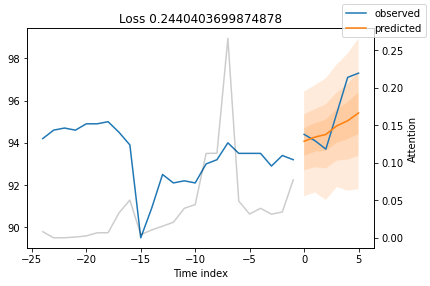

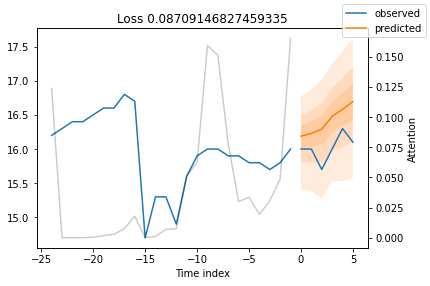

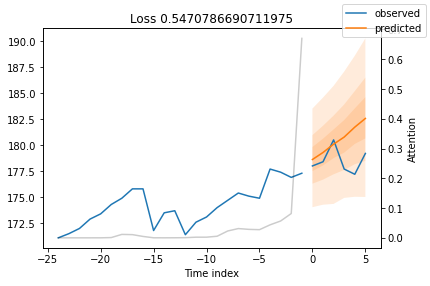

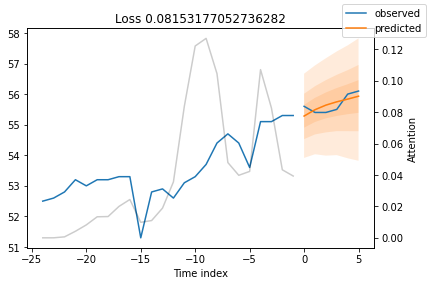

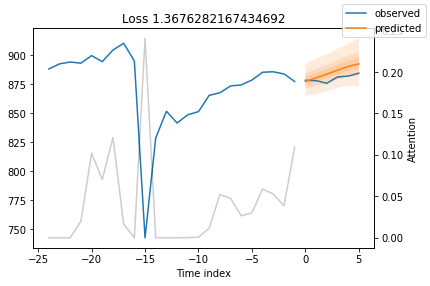

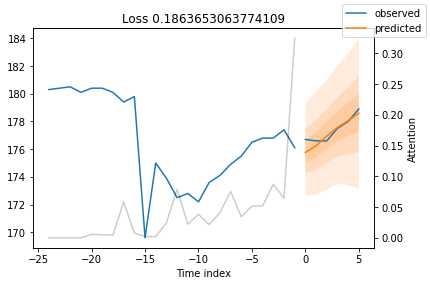

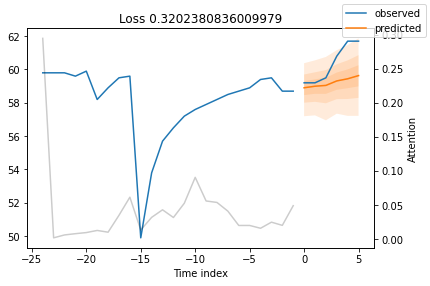

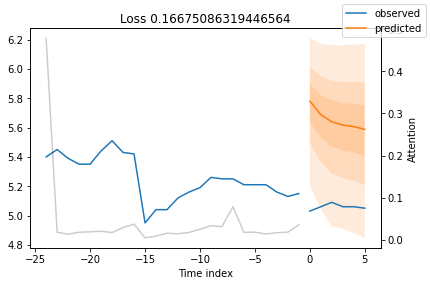

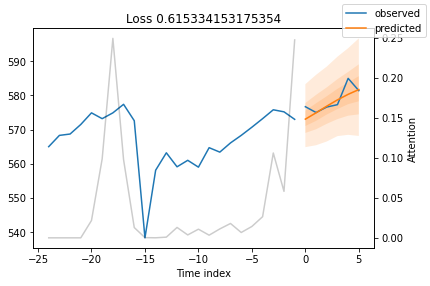

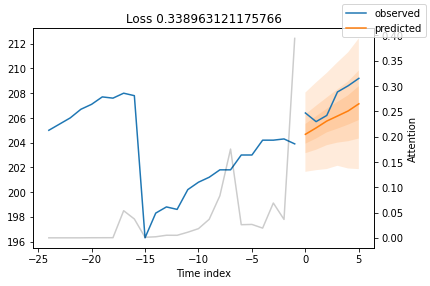

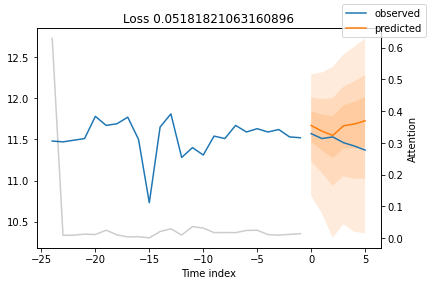

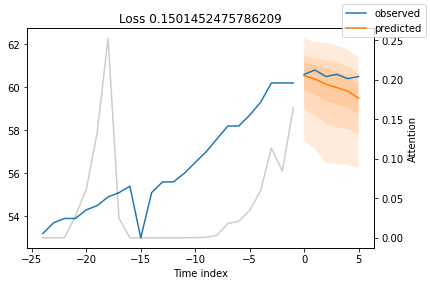

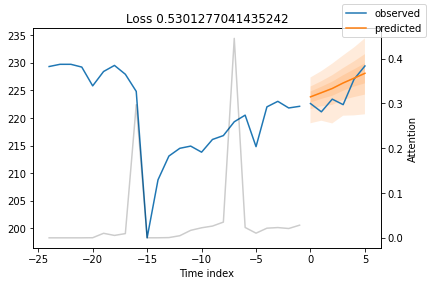

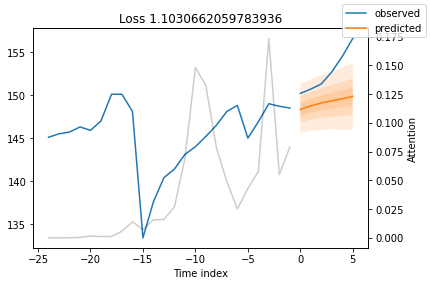

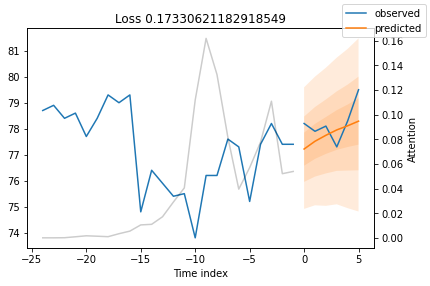

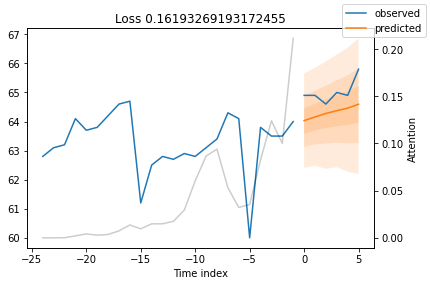

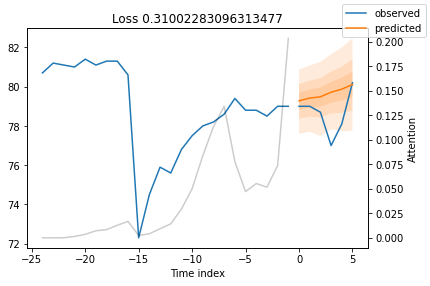

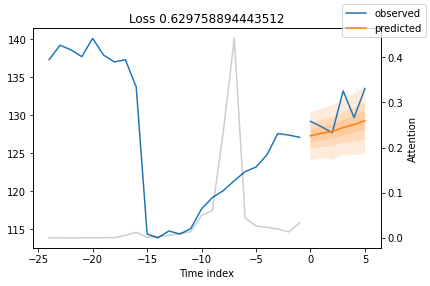

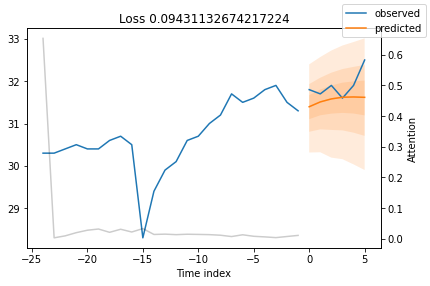

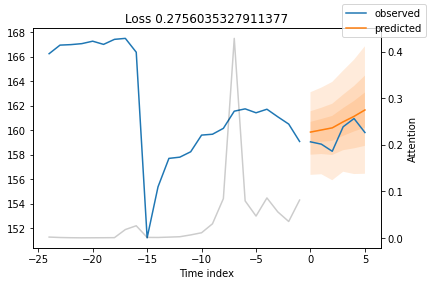

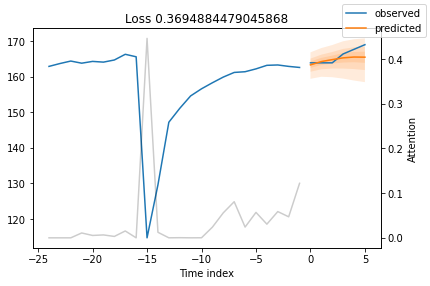

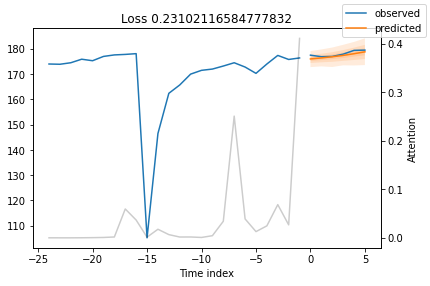

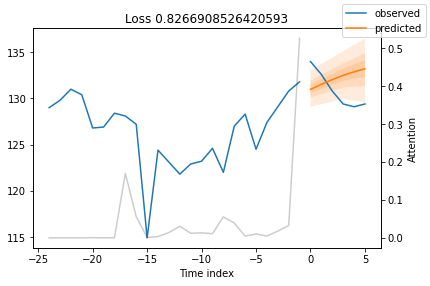

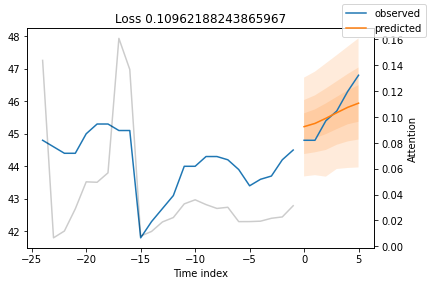

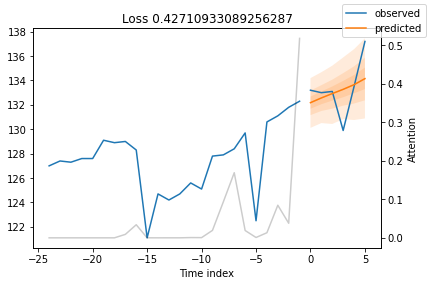

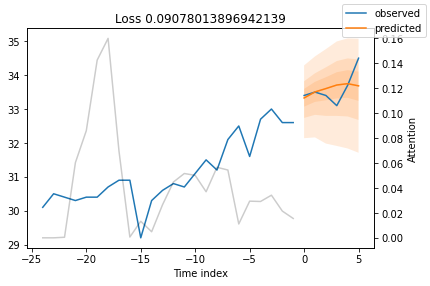

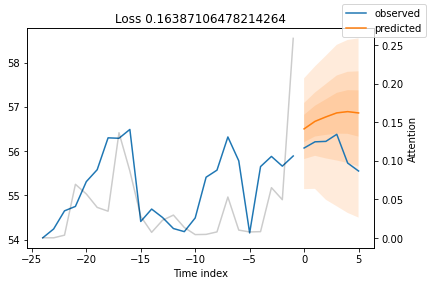

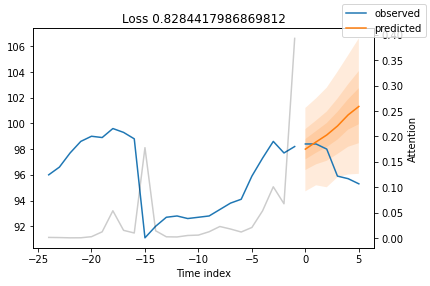

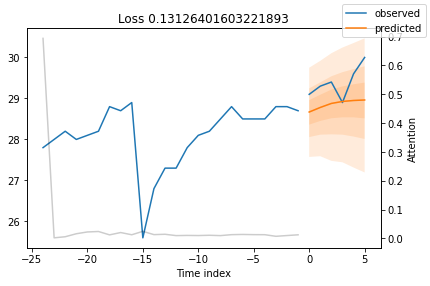

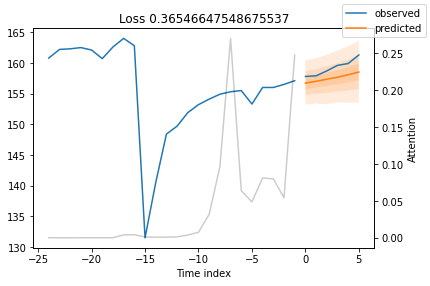

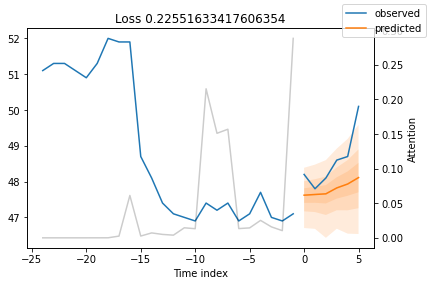

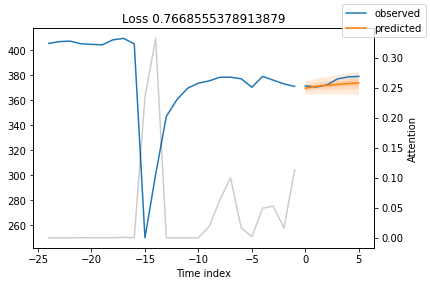

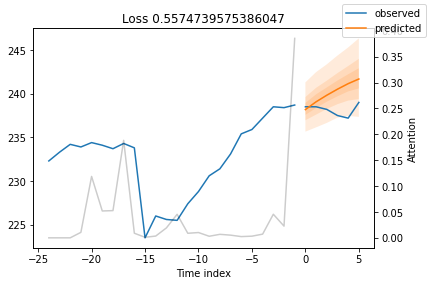

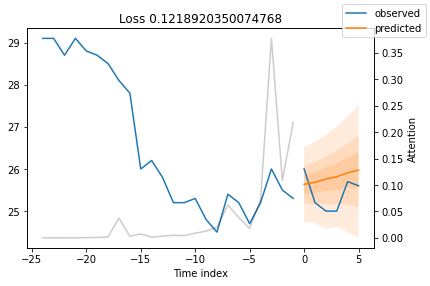

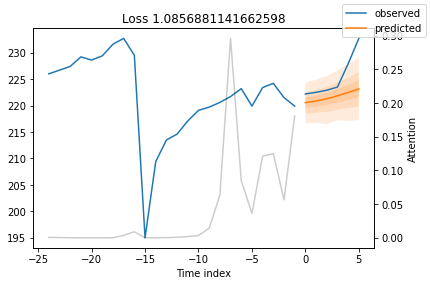

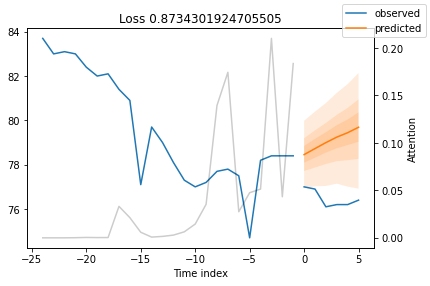

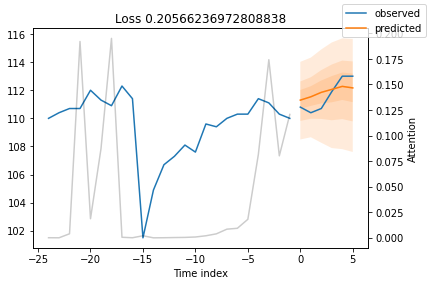

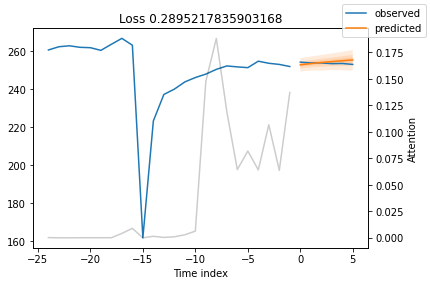

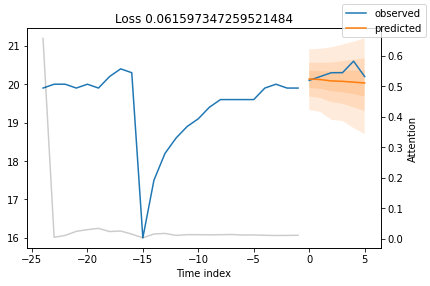

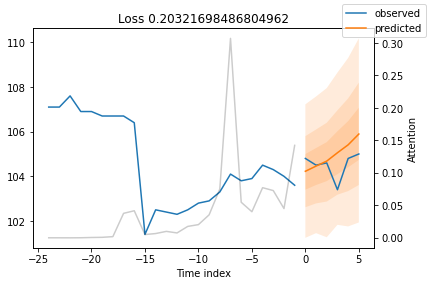

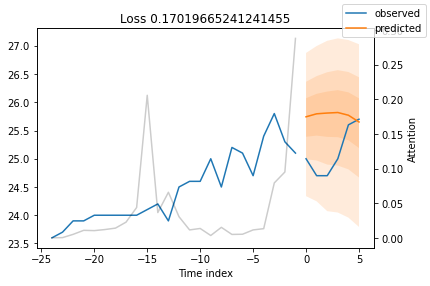

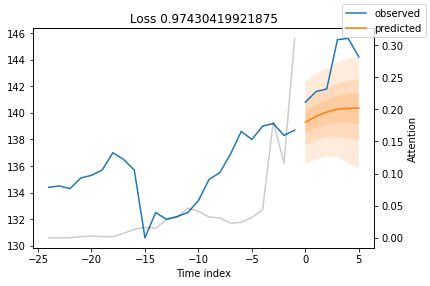

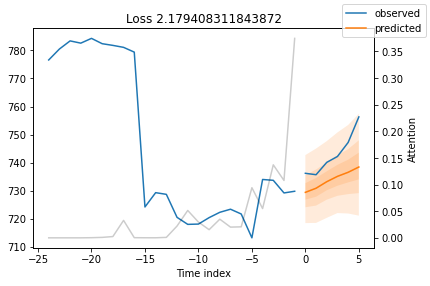

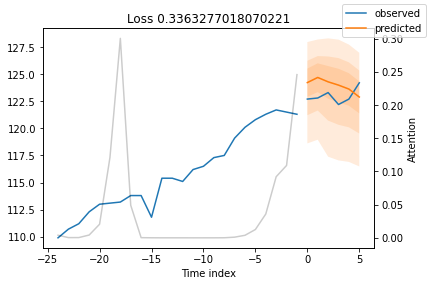

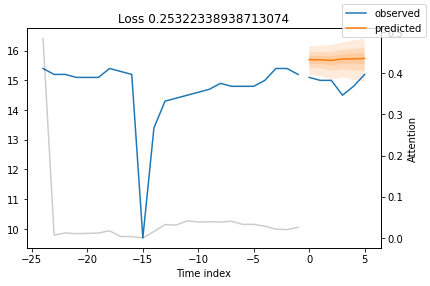

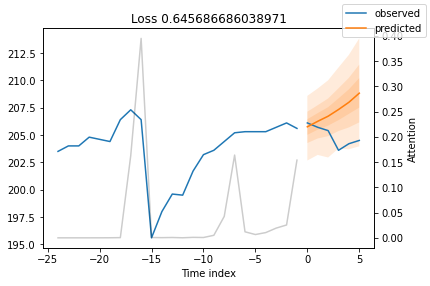

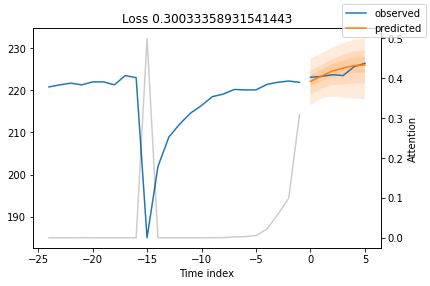

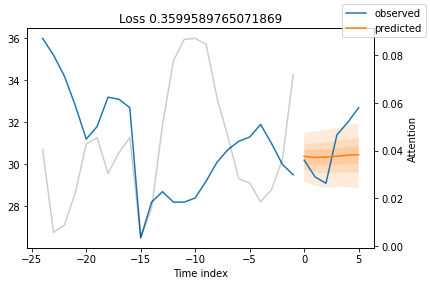

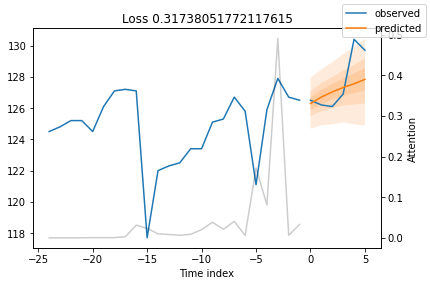

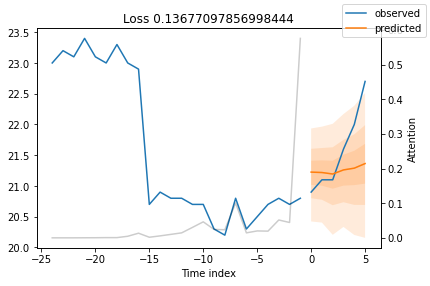

In [ ]:
for idx in range(50):  # plot 10 examples
    best_tft.plot_prediction(x, raw_predictions, idx=idx, add_loss_to_title=True);

/usr/local/lib/python3.7/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (SMAPE). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_full_state_property`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full

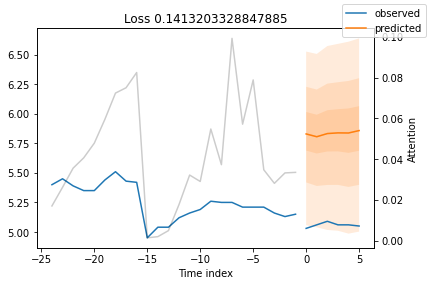

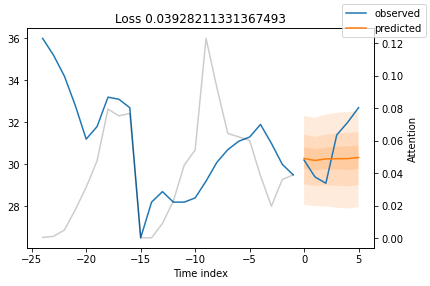

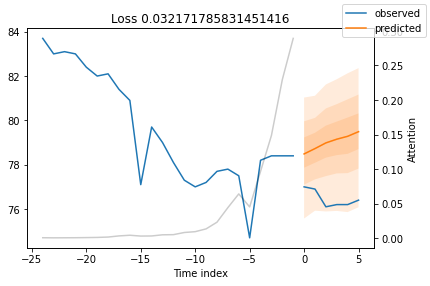

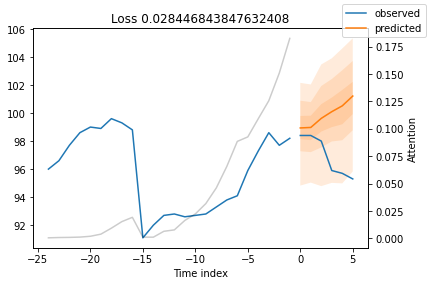

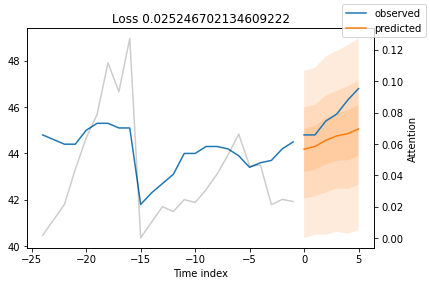

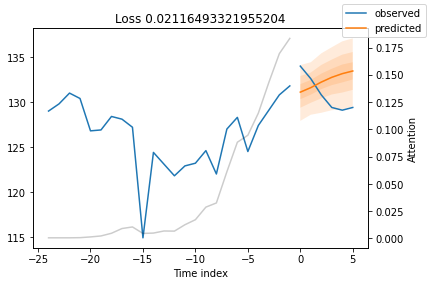

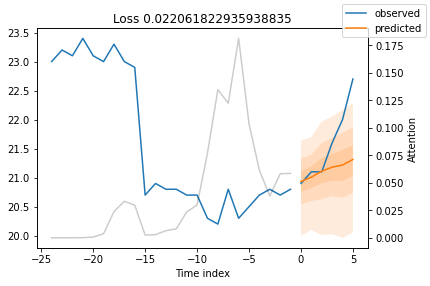

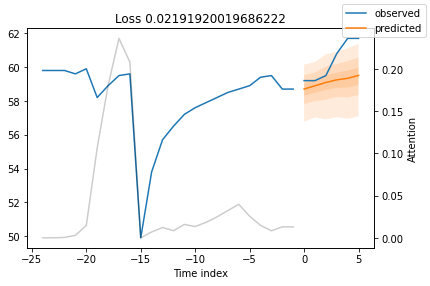

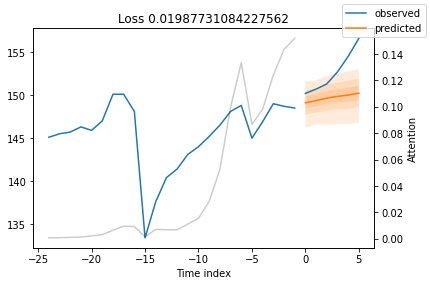

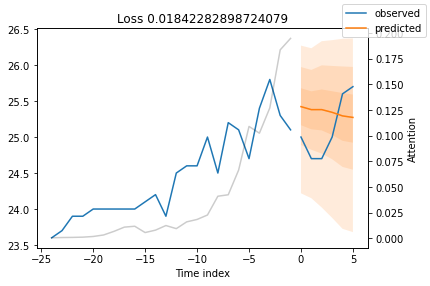

In [ ]:
# calcualte metric by which to display
predictions = best_tft.predict(val_dataloader)
mean_losses = SMAPE(reduction="none")(predictions, actuals).mean(1)
indices = mean_losses.argsort(descending=True)  # sort losses
for idx in range(10):  # plot 10 examples
    best_tft.plot_prediction(
        x, raw_predictions, idx=indices[idx], add_loss_to_title=SMAPE(quantiles=best_tft.loss.quantiles)
    );

In [ ]:
predictions, x = best_tft.predict(val_dataloader, return_x=True)
predictions_vs_actuals = best_tft.calculate_prediction_actual_by_variable(x, predictions)
best_tft.plot_prediction_actual_by_variable(predictions_vs_actuals);

In [ ]:
best_tft.predict(
    training.filter(lambda x: (x.State == "New York") & (x.time_idx_first_prediction == 176)),
    mode="quantiles",
)

tensor([[[320.1481, 321.9597, 323.1596, 324.5381, 325.8217, 327.1567, 329.2006],
         [320.0474, 322.2147, 323.6989, 325.3297, 326.8810, 328.4844, 330.8412],
         [320.2418, 322.4994, 324.1924, 325.9516, 327.7255, 329.4904, 332.0347],
         [320.2354, 322.7240, 324.7546, 326.7269, 328.7700, 330.7868, 333.6262],
         [319.1855, 322.4604, 324.8127, 327.0377, 329.3256, 331.5781, 334.8073],
         [319.2377, 322.6505, 325.2298, 327.7020, 330.2375, 332.7704, 336.2130]]])

/usr/local/lib/python3.7/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (SMAPE). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_full_state_property`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)


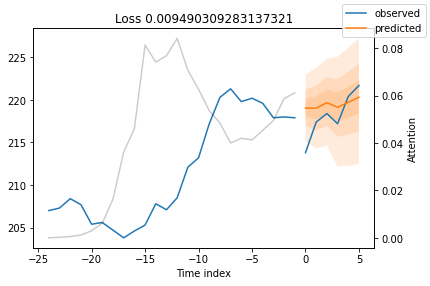

In [ ]:
raw_prediction, x = best_tft.predict(
    training.filter(lambda x: (x.State == "Ohio") & (x.time_idx_first_prediction ==336)),
    mode="raw",
    return_x=True,
)
best_tft.plot_prediction(x, raw_prediction, idx=0,add_loss_to_title=SMAPE(quantiles=best_tft.loss.quantiles));

In [ ]:
raw_prediction

Output(prediction=tensor([[[369.6809, 373.3534, 375.2043, 377.0383, 379.0722, 380.8117, 383.7693],
         [367.9879, 371.9501, 374.0639, 376.3963, 378.7315, 381.0791, 384.3434],
         [367.8729, 371.9779, 374.1547, 376.6362, 379.2082, 381.6019, 385.0715],
         [361.3687, 368.0232, 371.1326, 374.4950, 377.5949, 380.7694, 385.3923],
         [360.1048, 366.6462, 369.7652, 372.9078, 376.0798, 379.0021, 383.6252],
         [358.6005, 365.6144, 369.0582, 372.6366, 376.0870, 379.5296, 384.5597]],

        [[369.6357, 373.2935, 375.1342, 376.9614, 378.9854, 380.7153, 383.6575],
         [367.9403, 371.8908, 373.9968, 376.3231, 378.6516, 380.9909, 384.2431],
         [367.8185, 371.9108, 374.0796, 376.5550, 379.1196, 381.5058, 384.9623],
         [361.3279, 367.9710, 371.0741, 374.4293, 377.5249, 380.6913, 385.3038],
         [360.0641, 366.5916, 369.7020, 372.8363, 376.0020, 378.9152, 383.5255],
         [358.5668, 365.5689, 369.0059, 372.5772, 376.0232, 379.4584, 384.4777]],

      

**Importance Overall and City specific**

In [ ]:
interpretation = best_tft.interpret_output(raw_prediction, reduction="sum")


In [ ]:
interpretation

{'attention': tensor([3.0263e-05, 5.3360e-05, 7.9608e-05, 1.0739e-04, 1.4430e-04, 1.4608e-04,
         1.6738e-04, 2.0554e-04, 5.7204e-04, 5.9720e-03, 7.7548e-03, 8.3342e-03,
         6.3134e-03, 6.5207e-03, 6.1762e-03, 2.3698e-02, 5.3518e-02, 1.0791e+00,
         8.5394e-01, 8.8272e-01, 1.2147e+00, 2.2747e+00, 3.0071e+00, 3.6089e+00]),
 'static_variables': tensor([0.9491, 0.1926, 0.2980, 0.0758, 0.1787, 0.0314, 0.2080, 0.0373, 0.1030,
         0.9582, 0.0567, 0.1050, 0.1238, 0.0937, 0.0567, 0.1844, 0.0849, 0.0576,
         0.0503, 0.0511, 0.0861, 0.0487, 0.0446, 0.1642, 0.0822, 0.0596, 0.0195,
         0.0905, 0.0612, 0.0646, 0.0611, 0.2064, 0.0278, 0.4100, 0.0829, 0.0688,
         0.0729, 0.0435, 0.1115, 0.1847, 0.0068, 0.0309, 0.1337, 0.0224, 0.2290,
         0.0909, 0.0887, 0.0566, 0.0888, 0.0747, 0.1328, 0.1580, 0.1159, 0.1873,
         0.0457, 5.5319, 0.1186]),
 'encoder_variables': tensor([0.1144, 0.1837, 0.2651, 2.4474, 2.9934, 0.1211, 0.3821, 0.1894, 0.2899,
         0.5776, 0

In [ ]:
from torch import tensor

In [ ]:
interpretation["attention"]=tensor([0.0197, 0.0136, 0.0129, 0.0132, 0.0158, 0.0128, 0.0140, 0.0155, 0.0145,
          0.0142, 0.0150, 0.0146, 0.0166, 0.0177, 0.0179, 0.0196, 0.0200, 0.0190,
          0.0207, 0.0231, 0.0262, 0.0252, 0.0269, 0.0264, 0.0268, 0.0285, 0.0287,
          0.0306, 0.0309, 0.0312, 0.0301, 0.0292, 0.0266, 0.0245, 0.0237, 0.0222,
          0.0264, 0.0294, 0.0306, 0.0255, 0.0196, 0.0130, 0.0139, 0.0151, 0.0147,
          0.0132, 0.0154, 0.0152])
interpretation["static_variables"]=tensor([0.0086, 0.0569, 0.1330, 0.0404, 0.0266, 0.0125, 0.0068, 0.0027, 0.0106,
          0.0119, 0.0034, 0.0195, 0.0132, 0.0110, 0.0019, 0.0016, 0.0043, 0.0047,
          0.0019, 0.0087, 0.0019, 0.1750, 0.0095, 0.0018, 0.0014, 0.0015, 0.0046,
          0.0096, 0.0039, 0.0060, 0.0046, 0.0102, 0.0071, 0.0105, 0.0036, 0.0074,
          0.0104, 0.0063, 0.0059, 0.0147, 0.0015, 0.0025, 0.0117, 0.0153, 0.0139,
          0.0021, 0.0103, 0.0177, 0.0086, 0.0024, 0.1051, 0.0390, 0.0124, 0.0587,
          0.0038, 0.0075, 0.0116])
interpretation["encoder_variables"]=tensor([0.0141, 0.0199, 0.0166, 0.0732, 0.0235, 0.0299, 0.0062, 0.2263, 0.0106,
          0.0429, 0.0303, 0.0070, 0.0178, 0.0385, 0.0218, 0.0144, 0.0333, 0.0045,
          0.0031, 0.0030, 0.1741, 0.0215, 0.0061, 0.0062, 0.0209, 0.0413, 0.0498,
          0.0261, 0.0169])
interpretation["decoder_variables"]=tensor([0.0303, 0.9242, 0.0455])

NameError: ignored

{'attention': <Figure size 432x288 with 1 Axes>,
 'static_variables': <Figure size 504x1170 with 1 Axes>,
 'encoder_variables': <Figure size 504x684 with 1 Axes>,
 'decoder_variables': <Figure size 504x198 with 1 Axes>}

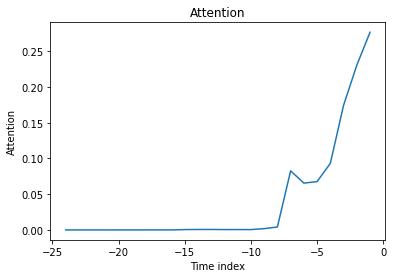

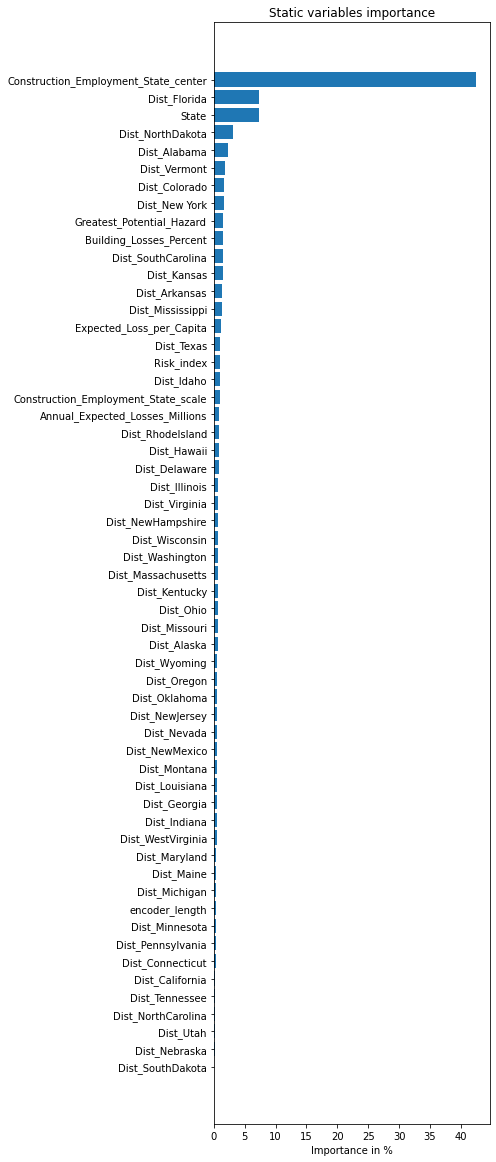

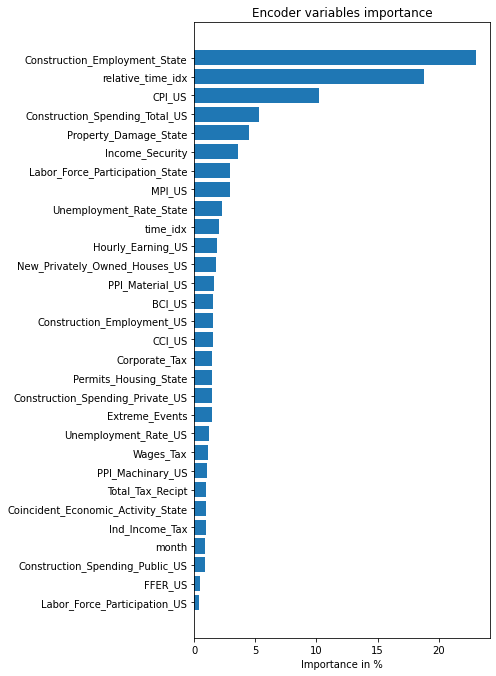

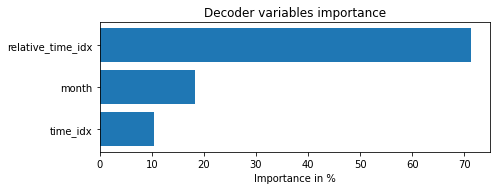

In [ ]:

best_tft.plot_interpretation(interpretation)

Predict on new data


In [ ]:
# select last 24 months from data (max_encoder_length is 24)
encoder_data = data[lambda x: x.time_idx > x.time_idx.max() - max_encoder_length]

# select last known data point and create decoder data from it by repeating it and incrementing the month
# in a real world dataset, we should not just forward fill the covariates but specify them to account
# for changes in special days and prices (which you absolutely should do but we are too lazy here)
last_data = data[lambda x: x.time_idx == x.time_idx.max()]
decoder_data = pd.concat(
    [last_data.assign(Date=lambda x: x.Date + pd.offsets.MonthBegin(i)) for i in range(1, max_prediction_length + 1)],
    ignore_index=True,
)

# add time index consistent with "data"
decoder_data["time_idx"] = decoder_data["Date"].dt.year * 12 + decoder_data["Date"].dt.month
decoder_data["time_idx"] += encoder_data["time_idx"].max() + 1 - decoder_data["time_idx"].min()

# adjust additional time feature(s)
decoder_data["month"] = decoder_data.Date.dt.month.astype(str).astype("category")  # categories have be strings

# combine encoder and decoder data
new_prediction_data = pd.concat([encoder_data, decoder_data], ignore_index=True)

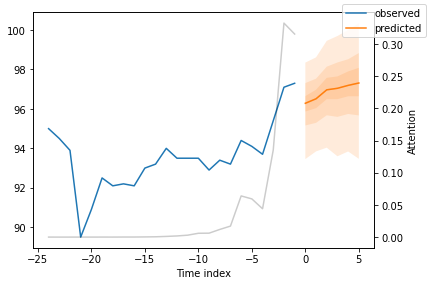

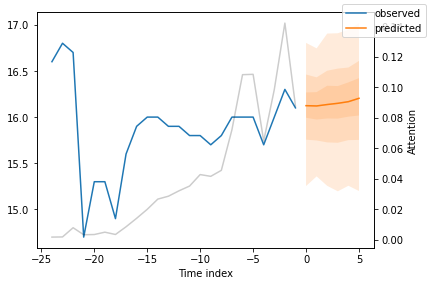

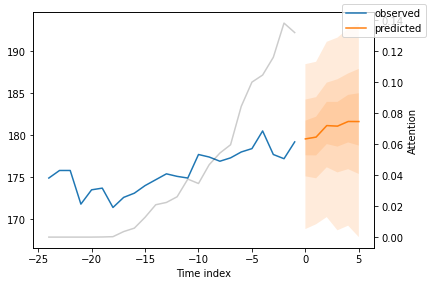

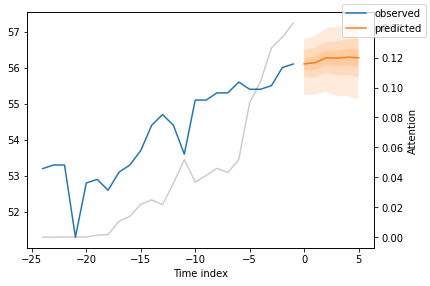

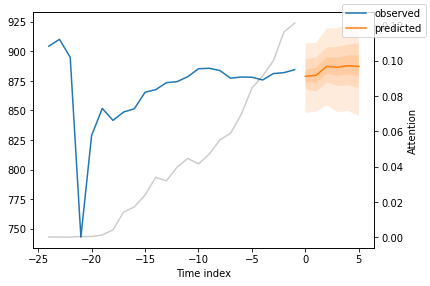

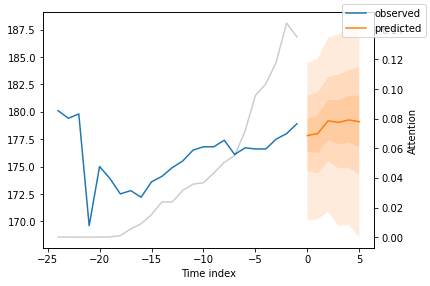

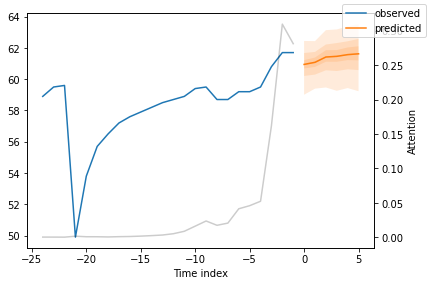

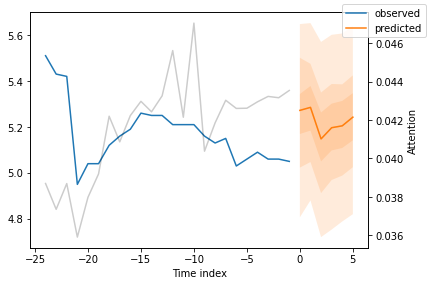

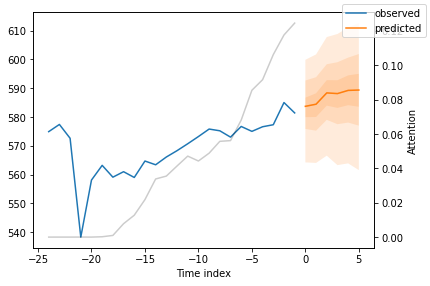

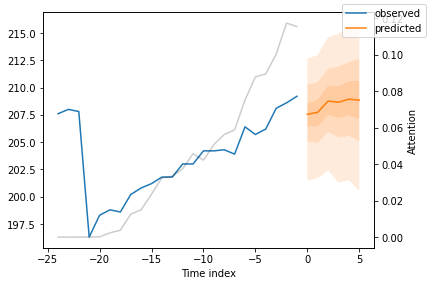

In [ ]:
new_raw_predictions, new_x = best_tft.predict(new_prediction_data, mode="raw", return_x=True)

for idx in range(10):  # plot 10 examples
    best_tft.plot_prediction(new_x, new_raw_predictions, idx=idx, show_future_observed=False);

In [ ]:
dependency = best_tft.predict_dependency(
    train_dataloader.dataset, 'Coincident_Economic_Activity_State', np.linspace(0, 30, 30), show_progress_bar=True, mode='dataframe')

Predict:   0%|          | 0/30 [00:00<?, ? batches/s]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid 

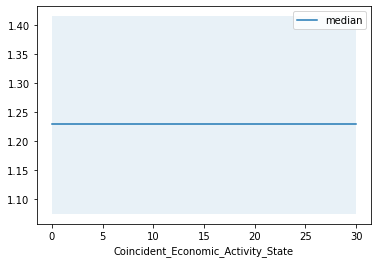

In [ ]:
# plotting median and 25% and 75% percentile
agg_dependency = dependency.groupby("Coincident_Economic_Activity_State").normalized_prediction.agg(
    median="median", q25=lambda x: x.quantile(0.25), q75=lambda x: x.quantile(0.75)
)
ax = agg_dependency.plot(y="median")
ax.fill_between(agg_dependency.index, agg_dependency.q25, agg_dependency.q75, alpha=0.1);